In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks


In [ ]:
# Import cleaned data
data = pd.read_csv('')
data.head()

,Deterioration_Rate_Moving_Avg,RDWYID,RDWY,BMP,EMP,CONTYDOT,LANES,LEN,LM,DISTRICT,...,TYPEt+28,TYPEt+29,TYPEt+30,TYPEt+31,TYPEt+32,TYPEt+33,TYPEt+34,TYPEt+35,TYPEt+36,TYPEt+37
0,0.176471,1010000,C,13.274,13.469,1,2,0.195,0.390,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.235294,1010000,C,13.469,14.160,1,2,0.691,1.382,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.158333,1010000,L,1.150,4.983,1,2,3.833,7.666,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375000,1010000,L,4.983,5.382,1,2,0.399,0.798,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.297619,1010000,L,5.382,7.777,1,2,2.395,4.790,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selecting Pilot Study

## Pilot Study 1:
Select 5 random cycles in Northwest district (District 3) and 5 random cycles in Central East Districts (District 4 and District 6). Rationale: district 3 has the highest average temperature increase and most significant decrease in precipitation while districts 4 and 6 have lower temperature increases and highest precipitation rate increases.

## Pilot Study 2:
Then, select 5 cycles with the highest deterioration rates and 5 cycles with the lowest deterioration rates. Other considerations: must have full cycle (pavement must have failed already and crack score must have reached below 6.5).

# Pilot Study 1

In [ ]:
# Select 5 random cycles from each of the 3 districts
district_3_data = data[data['DISTRICT'] == 3].sample(n=5, random_state=42)
district_4_data = data[data['DISTRICT'] == 4].sample(n=5, random_state=42)
district_6_data = data[data['DISTRICT'] == 6].sample(n=5, random_state=42)

# Concatenate the selected cycles
pilot_study_data = pd.concat([district_3_data, district_4_data, district_6_data])

#print(pilot_study_data)

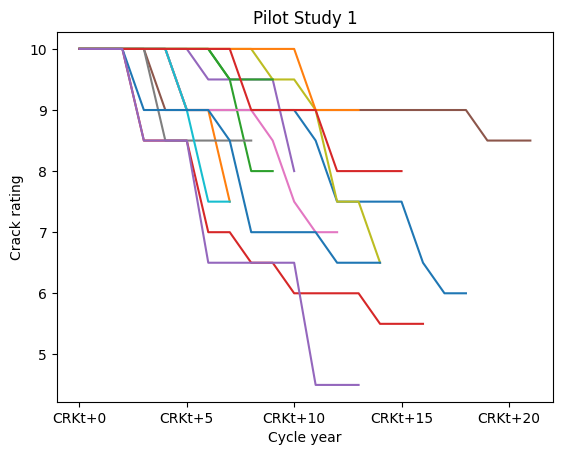

In [ ]:
df_transposed1 = pilot_study_data.loc[:, 'CRKt+0':'CRKt+37'].T
df_transposed1.plot(legend=False)

# Set labels and title
plt.xlabel('Cycle year')
plt.ylabel('Crack rating')
plt.title('Pilot Study 1')

# Show the plot
plt.show()

# Pilot Study 2

In [ ]:
# Function to check if a row forms a full cycle based on crack ratings
def is_full_cycle(row):
  age = row['YR'] - row['NEWYR']
  final_year_col = 'CRKt+' + str(age)
  return row[final_year_col] < 6.5

# Filter rows forming full cycles
full_cycle_data = data[data.apply(is_full_cycle, axis=1)]

# Select rows with the highest and lowest deterioration rate moving averages from full cycles
high_deterioration_data = full_cycle_data.nlargest(5, 'Deterioration_Rate_Moving_Avg')
low_deterioration_data = full_cycle_data.nsmallest(5, 'Deterioration_Rate_Moving_Avg')

# Concatenate the selected subsets to get the final pilot study dataset
pilot_study_data2 = pd.concat([high_deterioration_data, low_deterioration_data])

pilot_study_data2.loc[:, 'CONTYDOT']

3950    86
162      5
1234    16
1244    16
4193    87
4343    87
562     11
2850    72
564     11
3293    75
Name: CONTYDOT, dtype: int64

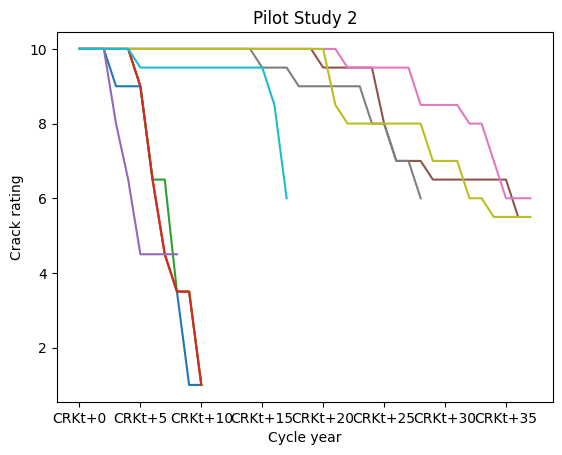

In [ ]:
df_transposed2 = pilot_study_data2.loc[:, 'CRKt+0':'CRKt+37'].T
df_transposed2.plot(legend=False)
# df_transposed3 = pilot_study_data2.loc[:, 'PRECt+0':'PRECt+37'].T
# df_transposed3.plot(legend=False)

# Set labels and title
plt.xlabel('Cycle year')
plt.ylabel('Crack rating')
plt.title('Pilot Study 2')

# Show the plot
plt.show()

# PILOT STUDY 2 TEST 1

Testing method of finding the number of years where the preciptation value was greater than 1 standard deviation away from the mean. Normalized this number by the number of years in that cycle

interestingly in pilot data, worse deterioration rates had less years that were more than 1 std dev away from mean. and better deterioration rates had more years that were greater than 1 std dev away from mean. because of this observation, went ahead and just tested this method on the entire dataset and plotted the det. rate vs normalized # years > 1 std dev

In [ ]:
# looking at precip outliers pilot study 2
# Assuming your precipitation data is in the specified columns
precipitation_data = pilot_study_data2.loc[:, 'PRECt+0':'PRECt+37']

# Initialize an empty list to store the normalized number of outliers for each row
normalized_num_outliers_list = []

# Iterate through each row
for index, row in precipitation_data.iterrows():
    # Calculate mean and standard deviation for the current row
    row_mean = row.mean()
    row_std = row.std()

    # Count the number of values more than 1 standard deviation away from the mean
    num_outliers = ((row > row_mean + row_std) | (row < row_mean - row_std)).sum()

    # Normalize by the length of the row and round to 3 decimals
    normalized_num_outliers = round(num_outliers / len(row), 3)
    normalized_num_outliers_list.append(normalized_num_outliers)

# Print or use the list of normalized number of outliers for each row
print("Normalized number of values more than 1 standard deviation away from the mean for each row:")
print(normalized_num_outliers_list)
print("first 5 are top 5 deterioration rates (faster deterioration) and last 5 are the bottom 5 rates (best-performing roads)")


Normalized number of values more than 1 standard deviation away from the mean for each row:
[0.053, 0.053, 0.053, 0.053, 0.079, 0.289, 0.263, 0.263, 0.263, 0.132]
first 5 are top 5 deterioration rates (faster deterioration) and last 5 are the bottom 5 rates (best-performing roads)


In [ ]:
# looking at avg temp outliers pilot study 2
# Assuming your precipitation data is in the specified columns
precipitation_data = pilot_study_data2.loc[:, 'AVGTEMt+0':'AVGTEMt+37']

# Initialize an empty list to store the normalized number of outliers for each row
normalized_num_outliers_list = []

# Iterate through each row
for index, row in precipitation_data.iterrows():
    # Calculate mean and standard deviation for the current row
    row_mean = row.mean()
    row_std = row.std()

    # Count the number of values more than 1 standard deviation away from the mean
    num_outliers = ((row > row_mean + row_std) | (row < row_mean - row_std)).sum()

    # Normalize by the length of the row and round to 3 decimals
    normalized_num_outliers = round(num_outliers / len(row), 3)
    normalized_num_outliers_list.append(normalized_num_outliers)

# Print or use the list of normalized number of outliers for each row
print("Normalized number of values more than 1 standard deviation away from the mean for each row:")
print(normalized_num_outliers_list)
print("first 5 are top 5 deterioration rates (faster deterioration) and last 5 are the bottom 5 rates (best-performing roads)")

Normalized number of values more than 1 standard deviation away from the mean for each row:
[0.053, 0.053, 0.053, 0.053, 0.053, 0.237, 0.289, 0.184, 0.289, 0.079]
first 5 are top 5 deterioration rates (faster deterioration) and last 5 are the bottom 5 rates (best-performing roads)


In [ ]:
# looking at outliers on entire data set
# Assuming your precipitation data is in the specified columns
data = pd.read_csv('/content/drive/MyDrive/CEE 4803 Final Project/Datasets/final datasets/deterioration_rates.csv')

# end_year = 2023
# for index, row in data.iterrows():
#   start_year = int(row['NEWYR'])
#   crk_columns = [f'CRKt+{year}' for year in range(start_year, end_year + 1)]

#   if len(crk_columns) < 10:
#     data = data.drop(index, axis=0)

precipitation_data = data.loc[:, 'PRECt+0':'PRECt+37']
avgtemp_data = data.loc[:, 'AVGTEMt+0':'AVGTEMt+37']
# precipitation_data = precipitation_data[precipitation_data.apply(lambda row: len(row) > 10, axis=1)]

# Initialize an empty list to store the normalized number of outliers for each row
precip_outliers_list_normalized = []
precip_outliers_list = []
for index, row in precipitation_data.iterrows():
    # Calculate mean and standard deviation for the current row
    row_mean = row.mean()
    row_std = row.std()
    # Count the number of values more than 1 standard deviation away from the mean
    num_outliers = ((row > row_mean + row_std) | (row < row_mean - row_std)).sum()
    # Normalize by the length of the row and round to 3 decimals
    precip_outliers = round(num_outliers / len(row), 3)
    precip_outliers_list_normalized.append(precip_outliers)
    precip_outliers_list.append(num_outliers)
data['Precip_Outliers_normalized'] = precip_outliers_list_normalized
data['Precip_Outliers'] = precip_outliers_list

avgtem_outliers_list = []
for index, row in avgtemp_data.iterrows():
    # Calculate mean and standard deviation for the current row
    row_mean = row.mean()
    row_std = row.std()
    # Count the number of values more than 1 standard deviation away from the mean
    num_outliers = ((row > row_mean + row_std) | (row < row_mean - row_std)).sum()
    # Normalize by the length of the row and round to 3 decimals
    avgtemp_outliers = round(num_outliers / len(row), 3)
    avgtem_outliers_list.append(avgtemp_outliers)
data['AvgTemp_Outliers'] = avgtem_outliers_list

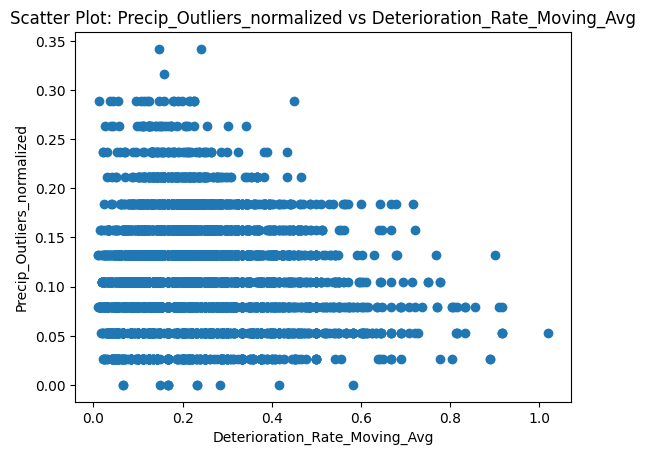

In [ ]:
# Plot 'Normalized_Outliers' against 'Deterioration_Rate_Moving_Avg'
plt.scatter(data['Deterioration_Rate_Moving_Avg'], data['Precip_Outliers_normalized'])
plt.xlabel('Deterioration_Rate_Moving_Avg')
plt.ylabel('Precip_Outliers_normalized')
plt.title('Scatter Plot: Precip_Outliers_normalized vs Deterioration_Rate_Moving_Avg')
plt.show()

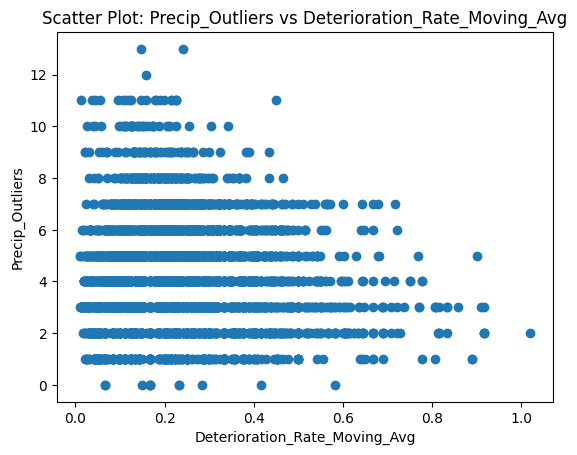

In [ ]:
# Plot 'Normalized_Outliers' against 'Deterioration_Rate_Moving_Avg'
plt.scatter(data['Deterioration_Rate_Moving_Avg'], data['Precip_Outliers'])
plt.xlabel('Deterioration_Rate_Moving_Avg')
plt.ylabel('Precip_Outliers')
plt.title('Scatter Plot: Precip_Outliers vs Deterioration_Rate_Moving_Avg')
plt.show()

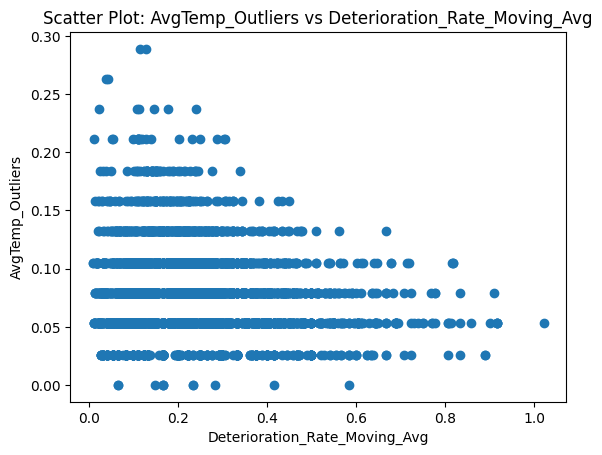

In [ ]:
plt.scatter(data['Deterioration_Rate_Moving_Avg'], data['AvgTemp_Outliers'])
plt.xlabel('Deterioration_Rate_Moving_Avg')
plt.ylabel('AvgTemp_Outliers')
plt.title('Scatter Plot: AvgTemp_Outliers vs Deterioration_Rate_Moving_Avg')
plt.show()

In [ ]:
X = data['AvgTemp_Outliers']
X = sm.add_constant(X)  # Add a constant term to the predictor

y = data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for AvgTemp_Outliers coefficient
print("Hypothesis Test for AvgTemp_Outliers Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.012
Model:                                       OLS   Adj. R-squared:                  0.012
Method:                            Least Squares   F-statistic:                     60.73
Date:                           Mon, 20 Nov 2023   Prob (F-statistic):           7.92e-15
Time:                                   00:07:02   Log-Likelihood:                 2826.7
No. Observations:                           4935   AIC:                            -5649.
Df Residuals:                               4933   BIC:                            -5636.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [ ]:
X = data['Precip_Outliers']
X = sm.add_constant(X)  # Add a constant term to the predictor

y = data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for Precip_Outliers coefficient
print("Hypothesis Test for Precip_Outliers Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.007
Model:                                       OLS   Adj. R-squared:                  0.007
Method:                            Least Squares   F-statistic:                     33.84
Date:                           Mon, 20 Nov 2023   Prob (F-statistic):           6.37e-09
Time:                                   00:26:15   Log-Likelihood:                 2813.3
No. Observations:                           4935   AIC:                            -5623.
Df Residuals:                               4933   BIC:                            -5610.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [ ]:
X = data[['AvgTemp_Outliers', 'Precip_Outliers']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1, 0])  # Hypothesis test for AvgTemp_Outliers coefficient
print("Hypothesis Test for AvgTemp_Outliers Coefficient:")
print(hypothesis_test_results)

hypothesis_test_results = model.t_test([0, 0, 1])  # Hypothesis test for Precip_Outliers coefficient
print("\nHypothesis Test for Precip_Outliers Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.012
Model:                                       OLS   Adj. R-squared:                  0.012
Method:                            Least Squares   F-statistic:                     30.44
Date:                           Mon, 20 Nov 2023   Prob (F-statistic):           7.30e-14
Time:                                   00:05:50   Log-Likelihood:                 2826.7
No. Observations:                           4935   AIC:                            -5647.
Df Residuals:                               4932   BIC:                            -5628.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

# pilot # of peak visuals


trying to calculate moving average of precipitation values, then counting the number of peaks. maybe more peaks = higher deterioration rates?

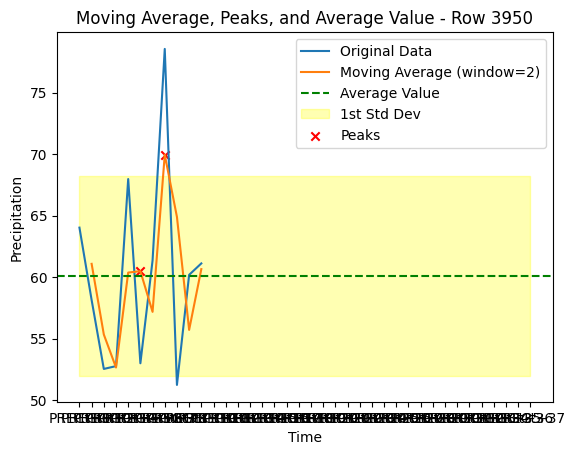

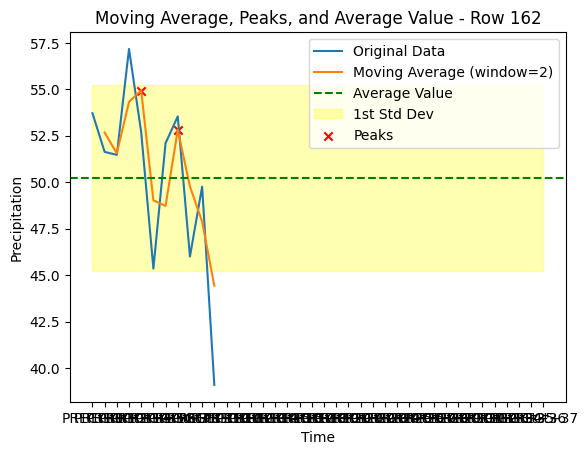

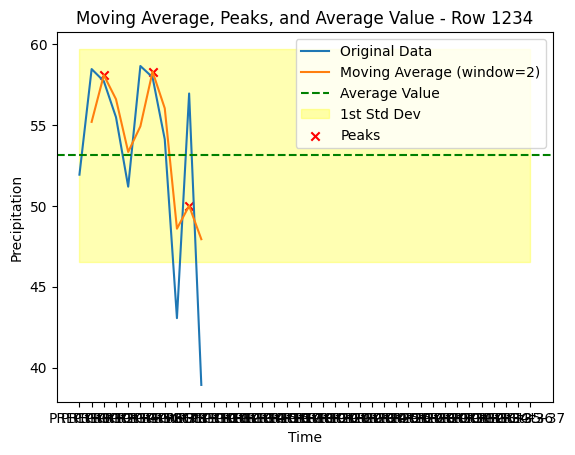

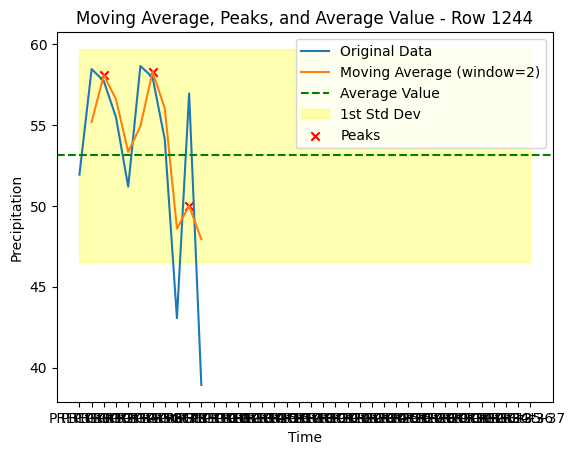

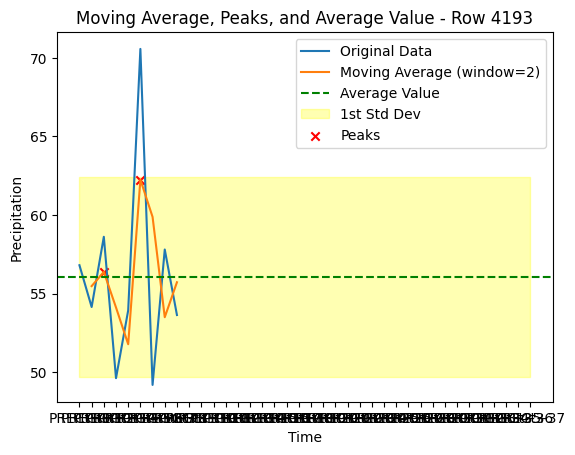

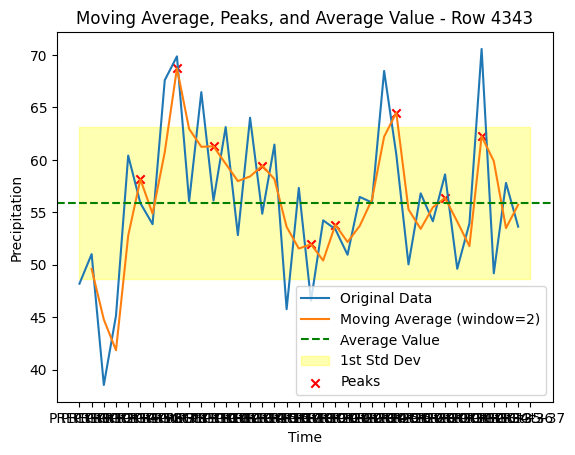

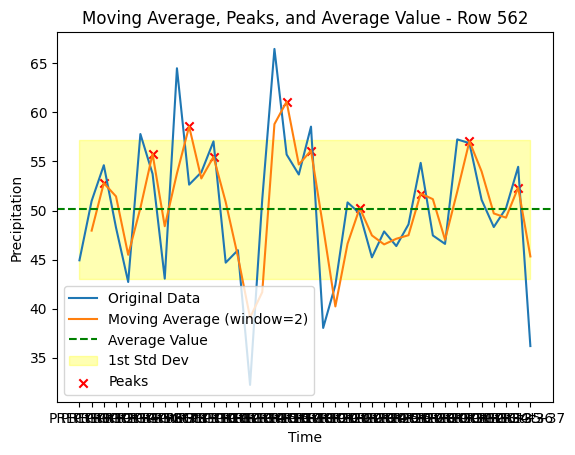

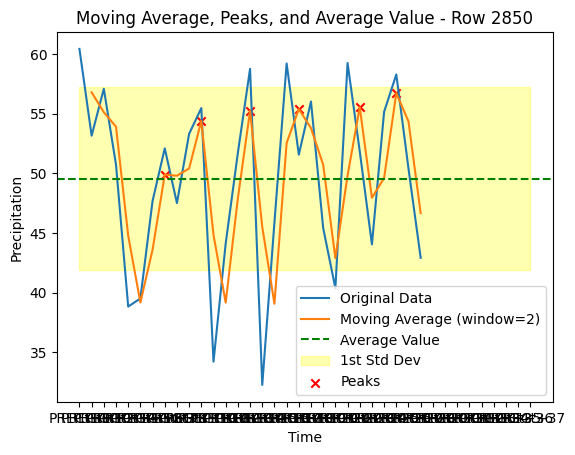

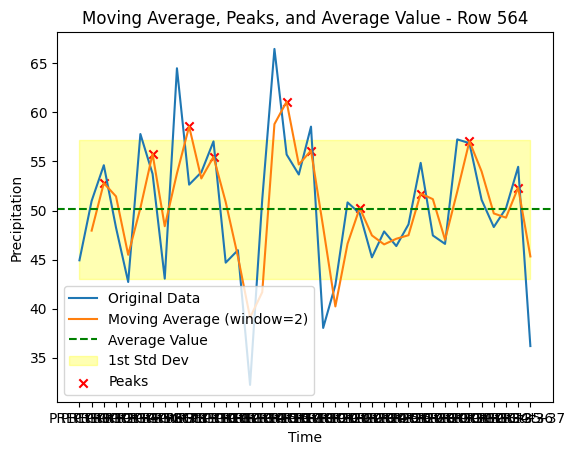

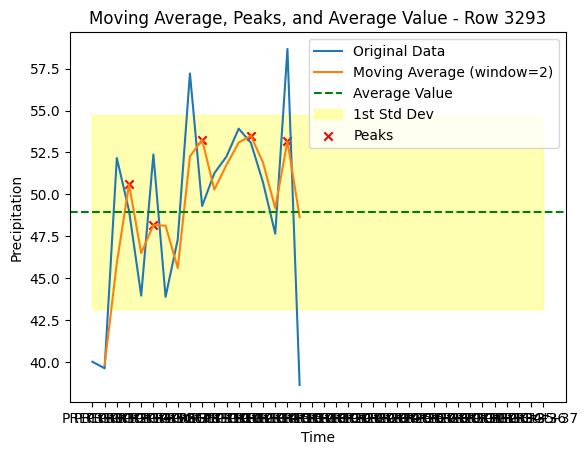

Number of peaks for each row: [2, 2, 3, 3, 2, 9, 10, 6, 10, 5]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your precipitation data is in the specified columns
precipitation_data = pilot_study_data2.loc[:, 'PRECt+0':'PRECt+37']

# Parameters
window_size = 2  # You can adjust this parameter based on your preference

# Initialize an empty list to store the number of peaks for each row
num_peaks_list = []

# Iterate through each row
for index, row in precipitation_data.iterrows():
    # Calculate the moving average for the current row
    moving_average = row.rolling(window=window_size).mean()

    # Find peaks in the moving average
    peaks, _ = find_peaks(moving_average, height=0)

    # Append the number of peaks to the list
    num_peaks_list.append(len(peaks))

    # Optional: Visualize the moving average, peaks, and average value for the current row
    plt.plot(precipitation_data.columns, row, label='Original Data')
    plt.plot(precipitation_data.columns, moving_average, label=f'Moving Average (window={window_size})')
    plt.axhline(y=row.mean(), color='green', linestyle='--', label='Average Value')

    # Plot shaded regions for the first standard deviation
    plt.fill_between(precipitation_data.columns, row.mean() - row.std(), row.mean() + row.std(), color='yellow', alpha=0.3, label='1st Std Dev')

    plt.scatter(precipitation_data.columns[peaks], moving_average.iloc[peaks], color='red', marker='x', label='Peaks')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.title(f'Moving Average, Peaks, and Average Value - Row {index}')
    plt.legend()
    plt.show()

# Print or use the list of number of peaks for each row
print("Number of peaks for each row:", num_peaks_list)

# Regression and Hypothesis Testing Set Up (# of peaks)

Defined moving average and num peaks functions and calculated the moving average of the precipitation and temperature for both pilot studies as well as the number of peaks (variability) in each.

In [ ]:
# Function to calculate the moving average rate
def moving_Average(row, window_size=3):
    cleaned_row = row.dropna()
    if len(cleaned_row) < window_size:  # Not enough data to calculate a moving average
        return np.nan
    moving_average = cleaned_row.rolling(window=window_size).mean().dropna()     # Calculate the moving average
    rate = (moving_average.iloc[-1] - moving_average.iloc[0]) / (len(moving_average) - 1)    # Calculate the rate of deterioration as the difference between the first and last moving average
    return abs(rate)    # Return the absolute value of the deterioration rate

# Function to calculate the number of peaks in a row
def num_Peaks(row, window_size=3):
    cleaned_row = row.dropna()
    moving_average = cleaned_row.rolling(window=window_size).mean().dropna()    # Calculate the moving average
    peaks, _ = find_peaks(moving_average, height=0)    # Find peaks in the moving average
    return len(peaks)    # Return the absolute value of the deterioration rate


#### PILOT STUDY 1 ###########

# Select precipitation and average temperature data
precipitation_data = pilot_study_data.loc[:, 'PRECt+0':'PRECt+37']
temperature_data = pilot_study_data.loc[:,'AVGTEMt+0':'AVGTEMt+37']


# Apply the moving_Average function
precip_rate_moving_average = precipitation_data.apply(moving_Average, axis=1)
temp_rate_moving_average = temperature_data.apply(moving_Average, axis=1)
precip_peaks = precipitation_data.apply(num_Peaks, axis=1)
temp_peaks = temperature_data.apply(num_Peaks, axis=1)

# Append the deterioration rates as a new column to the original dataframe
pilot_study_data['Precipitation_Rate_Moving_Avg'] = precip_rate_moving_average
pilot_study_data['Temperature_Rate_Moving_Avg'] = temp_rate_moving_average
pilot_study_data['Precip_Peaks'] = precip_peaks
pilot_study_data['Temp_Peaks'] = temp_peaks


#### PILOT STUDY 2 ###########
# Select precipitation and average temperature data
precipitation_data2 = pilot_study_data2.loc[:, 'PRECt+0':'PRECt+37']
temperature_data2 = pilot_study_data2.loc[:,'AVGTEMt+0':'AVGTEMt+37']


# Apply the moving_Average function
precip_rate_moving_average2 = precipitation_data2.apply(moving_Average, axis=1)
temp_rate_moving_average2 = temperature_data2.apply(moving_Average, axis=1)
precip_peaks2 = precipitation_data2.apply(num_Peaks, axis=1)
temp_peaks2 = temperature_data2.apply(num_Peaks, axis=1)

# Append the deterioration rates as a new column to the original dataframe
pilot_study_data2['Precipitation_Rate_Moving_Avg'] = precip_rate_moving_average2
pilot_study_data2['Temperature_Rate_Moving_Avg'] =temp_rate_moving_average2
pilot_study_data2['Precip_Peaks'] = precip_peaks2
pilot_study_data2['Temp_Peaks'] = temp_peaks2


#### WHOLE DATA SET ###########

total_data = pd.read_csv('/content/drive/MyDrive/CEE 4803 Final Project/Datasets/final datasets/deterioration_rates.csv')

# Select precipitation and average temperature data
precipitation_data_total = total_data.loc[:, 'PRECt+0':'PRECt+37']
temperature_data_total = total_data.loc[:,'AVGTEMt+0':'AVGTEMt+37']


# Apply the moving_Average function
total_precip_rate_moving_average = precipitation_data_total.apply(moving_Average, axis=1)
total_temp_rate_moving_average = temperature_data_total.apply(moving_Average, axis=1)
total_precip_peaks = precipitation_data_total.apply(num_Peaks, axis=1)
total_temp_peaks = temperature_data_total.apply(num_Peaks, axis=1)

# Append the deterioration rates as a new column to the original dataframe
total_data['Precipitation_Rate_Moving_Avg'] = total_precip_rate_moving_average
total_data['Temperature_Rate_Moving_Avg'] = total_temp_rate_moving_average
total_data['Precip_Peaks'] = total_precip_peaks
total_data['Temp_Peaks'] = total_temp_peaks



# PILOT STUDY 1 LINEAR REGRESSION AND HYPOTHESIS TEST (# of peaks)

Use just the precipitation rate and temperature rate to predict deterioration rate

In [ ]:
X = pilot_study_data[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1, 0])  # Hypothesis test for precipitation coefficient
print("Hypothesis Test for Precipitation Coefficient:")
print(hypothesis_test_results)

hypothesis_test_results = model.t_test([0, 0, 1])  # Hypothesis test for temperature coefficient
print("\nHypothesis Test for Temperature Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.046
Model:                                       OLS   Adj. R-squared:                 -0.113
Method:                            Least Squares   F-statistic:                    0.2903
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):              0.753
Time:                                   21:01:04   Log-Likelihood:                 11.235
No. Observations:                             15   AIC:                            -16.47
Df Residuals:                                 12   BIC:                            -14.35
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Very low R-squared means that this is a bad fit model. Further, the not significant p-values indicate that there is no relation between precipitation rate and temperature rate and deterioration rate. The results of the hypothesis test further confirm that. The p-values are larger than the chosen significance level (alpha = 0.05), so cannot reject the null hypothesis of no relationship.

In [ ]:
X = pilot_study_data[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg','Precip_Peaks','Temp_Peaks']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1, 0,0,0])  # Hypothesis test for precipitation coefficient
print("Hypothesis Test for Precipitation Coefficient:")
print(hypothesis_test_results)

hypothesis_test_results = model.t_test([0, 0, 1,0,0])  # Hypothesis test for temperature coefficient
print("\nHypothesis Test for Temperature Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.134
Model:                                       OLS   Adj. R-squared:                 -0.213
Method:                            Least Squares   F-statistic:                    0.3859
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):              0.814
Time:                                   21:02:03   Log-Likelihood:                 11.957
No. Observations:                             15   AIC:                            -13.91
Df Residuals:                                 10   BIC:                            -10.37
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


When add in number of peaks as predictor variabales, the fit is even worse, and the p-values are also not significant. This is because the predictors are correlated, as shown in the correlation matrix below.

In [ ]:
# Select the columns you want for the correlation matrix
selected_columns = ['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg', 'Precip_Peaks', 'Temp_Peaks']

# Create a new DataFrame with only the selected columns
selected_data = pilot_study_data[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

correlation_matrix

,Precipitation_Rate_Moving_Avg,Temperature_Rate_Moving_Avg,Precip_Peaks,Temp_Peaks
Precipitation_Rate_Moving_Avg,1.000000,-0.218205,-0.417120,-0.481129
Temperature_Rate_Moving_Avg,-0.218205,1.000000,0.125118,0.206245
Precip_Peaks,-0.417120,0.125118,1.000000,0.684003
Temp_Peaks,-0.481129,0.206245,0.684003,1.000000


# PILOT STUDY 2 LINEAR REGRESSION AND HYPOTHESIS TEST (# of peaks)

In [ ]:
X = pilot_study_data2[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data2['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1, 0])  # Hypothesis test for precipitation coefficient
print("Hypothesis Test for Precipitation Coefficient:")
print(hypothesis_test_results)

hypothesis_test_results = model.t_test([0, 0, 1])  # Hypothesis test for temperature coefficient
print("\nHypothesis Test for Temperature Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.451
Model:                                       OLS   Adj. R-squared:                  0.294
Method:                            Least Squares   F-statistic:                     2.878
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):              0.122
Time:                                   21:02:25   Log-Likelihood:                -2.2276
No. Observations:                             10   AIC:                             10.46
Df Residuals:                                  7   BIC:                             11.36
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In pilot study 2, the only significant variable is the precipitation rate, but the confidence interval of the hypothesis test is very close to 0, so the results are not reliable.

In [ ]:
X = pilot_study_data2[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg','Precip_Peaks','Temp_Peaks']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data2['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1, 0,0,0])  # Hypothesis test for precipitation coefficient
print("Hypothesis Test for Precipitation Coefficient:")
print(hypothesis_test_results)

hypothesis_test_results = model.t_test([0, 0, 1,0,0])  # Hypothesis test for temperature coefficient
print("\nHypothesis Test for Temperature Coefficient:")
print(hypothesis_test_results)

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.843
Model:                                       OLS   Adj. R-squared:                  0.717
Method:                            Least Squares   F-statistic:                     6.697
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):             0.0305
Time:                                   21:02:45   Log-Likelihood:                 4.0201
No. Observations:                             10   AIC:                             1.960
Df Residuals:                                  5   BIC:                             3.473
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Select the columns you want for the correlation matrix
selected_columns = ['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg', 'Precip_Peaks', 'Temp_Peaks']

# Create a new DataFrame with only the selected columns
selected_data = pilot_study_data[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

correlation_matrix

,Precipitation_Rate_Moving_Avg,Temperature_Rate_Moving_Avg,Precip_Peaks,Temp_Peaks
Precipitation_Rate_Moving_Avg,1.000000,-0.218205,-0.417120,-0.481129
Temperature_Rate_Moving_Avg,-0.218205,1.000000,0.125118,0.206245
Precip_Peaks,-0.417120,0.125118,1.000000,0.684003
Temp_Peaks,-0.481129,0.206245,0.684003,1.000000


Surprisingly, in pilot study 2, all 4 variables together do produce a good model (high R^2), but do not have significant p-values. So, both pilot study 1 and pilot study 2 indicate that climate change does not have a significant impact on deterioration rate.

# WHOLE DATA SET LINEAR REGRESSION

In [ ]:
# Drop rows where the temperature or precipitation rates are NaN
total_data_cleaned = total_data.dropna(subset=['Precipitation_Rate_Moving_Avg'])
total_data_cleaned = total_data.dropna(subset=['Temperature_Rate_Moving_Avg'])

X = total_data_cleaned[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = total_data_cleaned['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.024
Model:                                       OLS   Adj. R-squared:                  0.023
Method:                            Least Squares   F-statistic:                     59.31
Date:                           Sat, 18 Nov 2023   Prob (F-statistic):           3.51e-26
Time:                                   01:35:56   Log-Likelihood:                 2849.6
No. Observations:                           4924   AIC:                            -5693.
Df Residuals:                               4921   BIC:                            -5674.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

In [ ]:
X = total_data_cleaned[['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg','Precip_Peaks','Temp_Peaks']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = total_data_cleaned['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.034
Model:                                       OLS   Adj. R-squared:                  0.033
Method:                            Least Squares   F-statistic:                     43.30
Date:                           Sat, 18 Nov 2023   Prob (F-statistic):           9.23e-36
Time:                                   01:37:29   Log-Likelihood:                 2876.2
No. Observations:                           4924   AIC:                            -5742.
Df Residuals:                               4919   BIC:                            -5710.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

Bad fit, but all variables except number of precipitation peaks are significant.

In [ ]:
# Select the columns you want for the correlation matrix
selected_columns = ['Precipitation_Rate_Moving_Avg', 'Temperature_Rate_Moving_Avg', 'Precip_Peaks', 'Temp_Peaks']

# Create a new DataFrame with only the selected columns
selected_data = pilot_study_data[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

correlation_matrix

,Precipitation_Rate_Moving_Avg,Temperature_Rate_Moving_Avg,Precip_Peaks,Temp_Peaks
Precipitation_Rate_Moving_Avg,1.000000,-0.218205,-0.417120,-0.481129
Temperature_Rate_Moving_Avg,-0.218205,1.000000,0.125118,0.206245
Precip_Peaks,-0.417120,0.125118,1.000000,0.684003
Temp_Peaks,-0.481129,0.206245,0.684003,1.000000


# Accumulated precipitation

In [ ]:
pilot_study_data['Accumulated_Precip'] = pilot_study_data.loc[:, 'PRECt+0':'PRECt+37'].sum(axis=1)
pilot_study_data2['Accumulated_Precip'] = pilot_study_data2.loc[:, 'PRECt+0':'PRECt+37'].sum(axis=1)
data['Accumulated_Precip'] = data.loc[:, 'PRECt+0':'PRECt+37'].sum(axis=1)
data = data[data['Accumulated_Precip'] != 0]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.060
Model:                                       OLS   Adj. R-squared:                 -0.013
Method:                            Least Squares   F-statistic:                    0.8248
Date:                           Sun, 19 Nov 2023   Prob (F-statistic):              0.380
Time:                                   07:41:24   Log-Likelihood:                 11.342
No. Observations:                             15   AIC:                            -18.68
Df Residuals:                                 13   BIC:                            -17.27
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

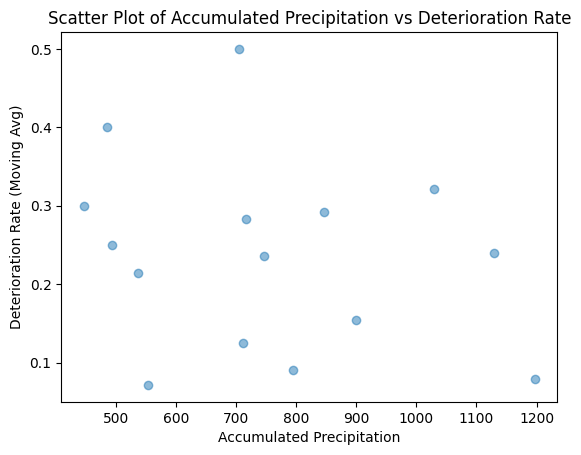

In [ ]:
# PILOT STUDY 1 ACCUMULATED PRECIPTATION VS DET RATE

X = pilot_study_data[['Accumulated_Precip']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for accumulated precip coefficient
print("Hypothesis Test for Accumulated Precipitation Coefficient:")
print(hypothesis_test_results)

plt.scatter(pilot_study_data['Accumulated_Precip'], pilot_study_data['Deterioration_Rate_Moving_Avg'], alpha=0.5)  # 'alpha' controls the transparency of the points

# Add labels and title
plt.xlabel('Accumulated Precipitation')
plt.ylabel('Deterioration Rate (Moving Avg)')
plt.title('Scatter Plot of Accumulated Precipitation vs Deterioration Rate')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.747
Model:                                       OLS   Adj. R-squared:                  0.715
Method:                            Least Squares   F-statistic:                     23.60
Date:                           Sun, 19 Nov 2023   Prob (F-statistic):            0.00126
Time:                                   07:41:27   Log-Likelihood:                 1.6400
No. Observations:                             10   AIC:                            0.7200
Df Residuals:                                  8   BIC:                             1.325
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

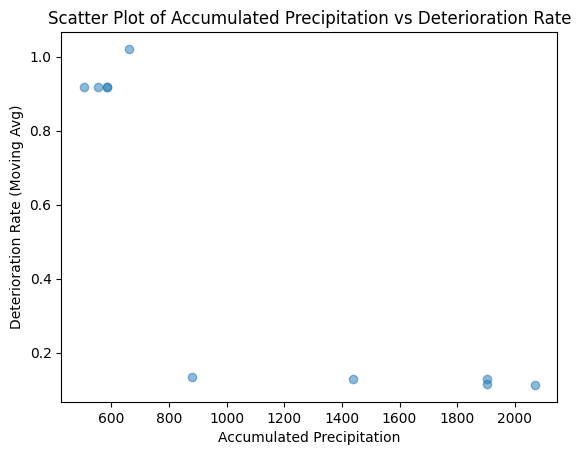

In [ ]:
# PILOT STUDY 2 ACCUMULATED PRECIPTATION VS DET RATE

X = pilot_study_data2[['Accumulated_Precip']]
X = sm.add_constant(X)  # Add a constant term to the predictor

y = pilot_study_data2['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for accumulated precip coefficient
print("Hypothesis Test for Accumulated Precipitation Coefficient:")
print(hypothesis_test_results)

plt.scatter(pilot_study_data2['Accumulated_Precip'], pilot_study_data2['Deterioration_Rate_Moving_Avg'], alpha=0.5)  # 'alpha' controls the transparency of the points

# Add labels and title
plt.xlabel('Accumulated Precipitation')
plt.ylabel('Deterioration Rate (Moving Avg)')
plt.title('Scatter Plot of Accumulated Precipitation vs Deterioration Rate')

# Show the plot
plt.show()

                                  OLS Regression Results                                 
Dep. Variable:     Deterioration_Rate_Moving_Avg   R-squared:                       0.023
Model:                                       OLS   Adj. R-squared:                  0.023
Method:                            Least Squares   F-statistic:                     118.0
Date:                           Sun, 19 Nov 2023   Prob (F-statistic):           3.51e-27
Time:                                   07:41:29   Log-Likelihood:                 2849.3
No. Observations:                           4924   AIC:                            -5695.
Df Residuals:                               4922   BIC:                            -5682.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

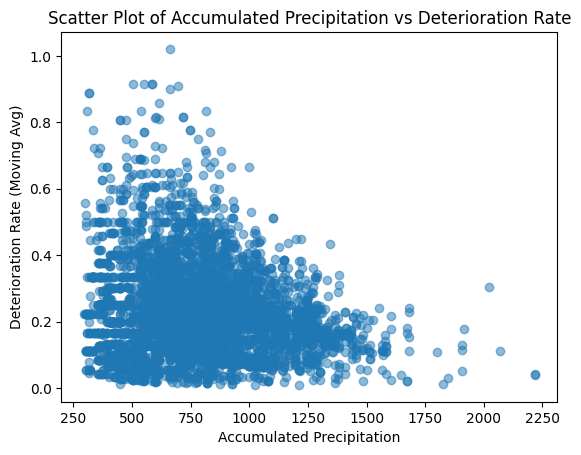

In [ ]:
# ENTIRE DATASET ACCUMULATED PRECIPTATION VS DET RATE

X = data['Accumulated_Precip']
X = sm.add_constant(X)  # Add a constant term to the predictor

y = data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for accumulated precip coefficient
print("Hypothesis Test for Accumulated Precipitation Coefficient:")
print(hypothesis_test_results)

plt.scatter(data['Accumulated_Precip'], data['Deterioration_Rate_Moving_Avg'], alpha=0.5)  # 'alpha' controls the transparency of the points

# Add labels and title
plt.xlabel('Accumulated Precipitation')
plt.ylabel('Deterioration Rate (Moving Avg)')
plt.title('Scatter Plot of Accumulated Precipitation vs Deterioration Rate')

# Show the plot
plt.show()

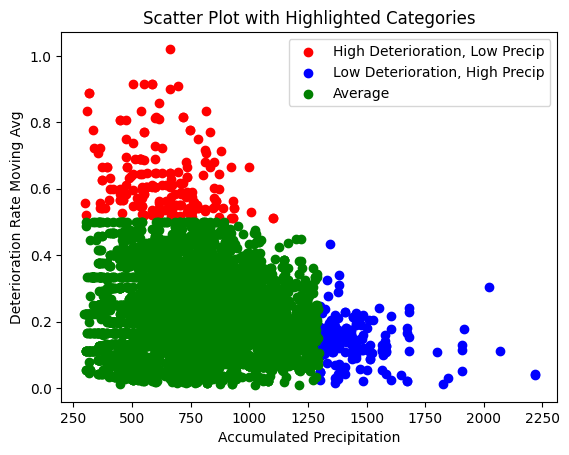

In [ ]:
#plt.scatter(data['Accumulated_Precip'], data['Deterioration_Rate_Moving_Avg'], alpha=0.5)

lowprec_highdetrate = data[(data['Deterioration_Rate_Moving_Avg'] > 0.5) & (data['Accumulated_Precip'] < 1200)]
highprec_lowdetrates = data[(data['Deterioration_Rate_Moving_Avg'] < 0.5) & (data['Accumulated_Precip'] > 1300)]
average = data[(data['Deterioration_Rate_Moving_Avg'] <= 0.5) & (data['Accumulated_Precip'] < 1300)]

plt.scatter(lowprec_highdetrate['Accumulated_Precip'], lowprec_highdetrate['Deterioration_Rate_Moving_Avg'], color='red', label='High Deterioration, Low Precip')
plt.scatter(highprec_lowdetrates['Accumulated_Precip'], highprec_lowdetrates['Deterioration_Rate_Moving_Avg'], color='blue', label='Low Deterioration, High Precip')
plt.scatter(average['Accumulated_Precip'], average['Deterioration_Rate_Moving_Avg'], color='green')

# Set labels and title
plt.xlabel('Accumulated Precipitation')
plt.ylabel('Deterioration Rate Moving Avg')
plt.title('Scatter Plot with Highlighted Categories')

# Show legend
plt.legend()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:           cycle_length   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.353e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:03:46   Log-Likelihood:                -6702.4
No. Observations:                4924   AIC:                         1.341e+04
Df Residuals:                    4922   BIC:                         1.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1923      0

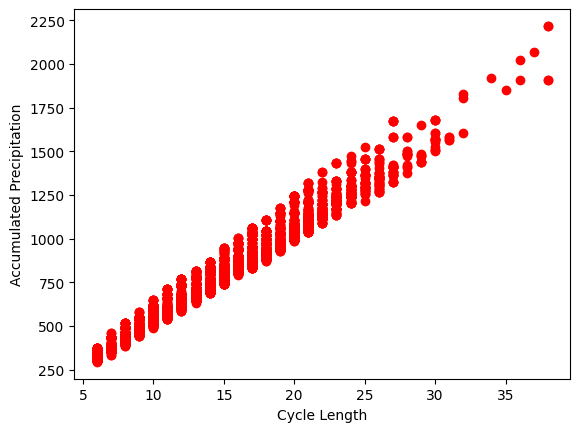

In [ ]:
data['cycle_length'] = data.loc[:, 'AVGTEMt+0':'AVGTEMt+37'].count(axis=1)

plt.xlabel('Cycle Length')
plt.ylabel('Accumulated Precipitation')

plt.scatter(data['cycle_length'], data['Accumulated_Precip'], color='red')


In [ ]:
# ENTIRE DATASET ACCUMULATED PRECIPTATION VS DET RATE

X = data['Accumulated_Precip']
X = sm.add_constant(X)  # Add a constant term to the predictor

y = data['Deterioration_Rate_Moving_Avg']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

hypothesis_test_results = model.t_test([0, 1])  # Hypothesis test for accumulated precip coefficient
print("Hypothesis Test for Accumulated Precipitation Coefficient:")
print(hypothesis_test_results)

plt.scatter(data['Accumulated_Precip'], data['Deterioration_Rate_Moving_Avg'], alpha=0.5)  # 'alpha' controls the transparency of the points

# Add labels and title
plt.xlabel('Accumulated Precipitation')
plt.ylabel('Deterioration Rate (Moving Avg)')
plt.title('Scatter Plot of Accumulated Precipitation vs Deterioration Rate')

# Show the plot
plt.show()